# CME 193 - Pandas Exercise Supplement

In this extended exercise, you'll load and play with CO2 data collected at the Mauna Loa observatory over the last 60 years. 

* NOAA Website: https://www.esrl.noaa.gov/gmd/ccgg/trends/full.html
* NOAA data: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

The monthly data can be found at this [link](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt)

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

Reads the data from the ftp server directly.

In [2]:
df = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', 
                   delim_whitespace=True, 
                   comment='#',
                   names=["year", "month", "decdate", "co2", "co2interp", "trend", "days"],
                   index_col=False)

In [3]:
pd.set_option('display.max_rows', 10)
df

,year,month,decdate,co2,co2interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
743,2020,2,2020.125,414.11,414.11,413.26,28
744,2020,3,2020.208,414.51,414.51,413.03,26
745,2020,4,2020.292,416.21,416.21,413.38,28
746,2020,5,2020.375,417.07,417.07,413.59,27


In [4]:
# copies the original data.
orig = df.copy()

## Part 1 - Normalize the Date

1. create a new column for the dataframe called 'day' that is set to be 1 in every entry

In [5]:
# your code here
df['day'] = 1

2. The dataframe now has columns for 'day', 'month', and 'year'.  Use `pd.to_datetime()` to create a new series of dates 

`dates = pd.to_datetime(...)`

In [22]:
# your code here
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str), yearfirst = True)

3. set a new column of the dataframe to hold this series.  Call the column `'date'`

In [ ]:
# your code here

4. set the index of the dataframe to be the `'date'` column using the `set_index()` method.

In [24]:
# your code here
df.set_index('date', inplace = True)
df.head()

,year,month,decdate,co2,co2interp,trend,days,day
date,,,,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71,314.62,-1,1
1958-04-01,1958,4,1958.292,317.45,317.45,315.29,-1,1
1958-05-01,1958,5,1958.375,317.50,317.50,314.71,-1,1
1958-06-01,1958,6,1958.458,-99.99,317.10,314.85,-1,1
1958-07-01,1958,7,1958.542,315.86,315.86,314.98,-1,1


5. Now let's remove the old columns with date information.  Use the `drop()` method to remove the 'day', 'month', 'year', and 'decdate' columns.  Hint: `df.drop(..., axis=1, inplace=True)`

5a. Go ahead and drop the 'days' column as well, since we're not going to use it.

In [28]:
# your code here
df.drop(['year', 'month', 'day', 'decdate', 'days'], axis = 1, inplace = True)

## Part 2 - deal with missing values

1. First, use the `plot()` method to visualize the contents of your dataframe.  What do you see?

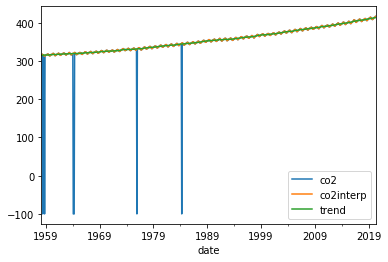

In [29]:
# your code here
df.plot()

if you read the header for the file we used to load the dataframe, you'll see that missing values take the value -99.99.

2. Set values that are `-99.99` to `None` (this indicates a missing value in Pandas).

Hint: use the `applymap()` method, and the lambda function
```python
lambda x: None if x == -99.99 else x
```
If you're familiar with [ternary operators](https://en.wikipedia.org/wiki/%3F:), this is the equivalent of
```
x == -99.99 ? None : x
```
Note that you may need to make a new assignment e.g., `df = df.applymap(...)`

In [30]:
# your code here
df = df.applymap(lambda x: None if x == -99.99 else x)

3. Plot your dataframe again.  What do you see now?

3a. Try plotting just the 'co2' series.  What do you see?

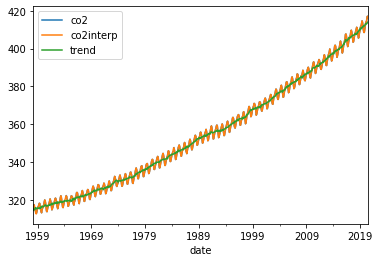

In [31]:
# your code here
df.plot()

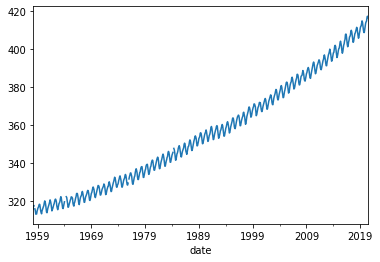

In [33]:
df['co2'].plot()

## Part 3 - Create New DataFrames with rows that meet conditions

1. Create new dataframe called `recent` that contains all rows of the previous dataframe since 2007.  Plot it.

In [34]:
df.head()

,co2,co2interp,trend
date,,,
1958-03-01,315.71,315.71,314.62
1958-04-01,317.45,317.45,315.29
1958-05-01,317.50,317.50,314.71
1958-06-01,NaN,317.10,314.85
1958-07-01,315.86,315.86,314.98


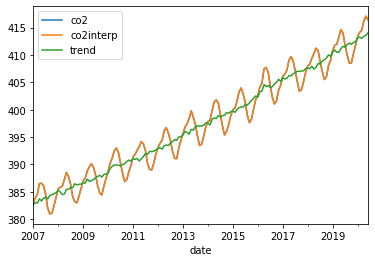

In [35]:
# your code here
recent = df[df.index.year >= 2007]
recent.plot()

2. Create a new dataframe called `old` that contains all rows of the dataframe before 1990.  Plot it.

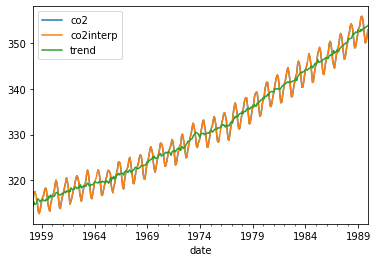

In [37]:
# your code here
old = df[df.index.year < 1990]
old.plot()

##### At this point, by inspection, you might be convinced there is further analysis to be done

In [38]:
np.var(old['trend']), np.var(recent['trend'])

(128.5328253912996, 83.37141457476004)

## Part 4 - Create some groups

Let's go back to the original data that we loaded

In [39]:
df = orig
df

,year,month,decdate,co2,co2interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
743,2020,2,2020.125,414.11,414.11,413.26,28
744,2020,3,2020.208,414.51,414.51,413.03,26
745,2020,4,2020.292,416.21,416.21,413.38,28
746,2020,5,2020.375,417.07,417.07,413.59,27


Suppose that we want to look at co2 averages by year instead of by month.

1. drop rows with missing values

1a. apply the map that sends -99.99 to none

1b. use the `dropna()` method to remove rows with missing values: `df = df.dropna()`

In [45]:
# your code here
mask = df['co2'] == -99.99
df = df[~mask]

2. Create a group for each year (use key 'year')

In [46]:
# your code here
year_group = df.groupby('year')

3. Aggregate the groups into a new dataframe, `df2`, using `np.mean`

3a. you can drop all the columns except `'co2'` if you'd like

In [53]:
# your code here
year_group_mean_count = year_group['co2'].agg(['mean', 'count'])
year_group_mean_count

,mean,count
year,,
1958,315.331250,8
1959,315.974167,12
1960,316.907500,12
1961,317.637500,12
1962,318.450833,12
...,...,...
2016,404.239167,12
2017,406.553333,12
2018,408.521667,12


4. make a plot of the `'co2'` series

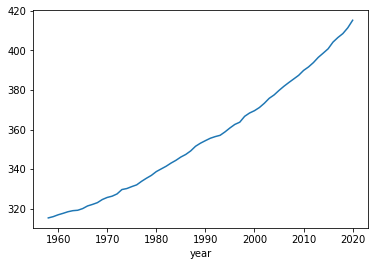

In [54]:
# your code here
year_group_mean_count['mean'].plot()